In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

from IPython.display import clear_output
import matplotlib.pyplot as plt

import segmentation_models as sm #pip install segmentation_models

import tensorflow_addons as tfa #pip install tensorflow_addons==0.11.2
import cv2
import numpy as np
print(tfa.__version__)
import matplotlib
from matplotlib import pyplot
from matplotlib.image import imread

print(keras.__version__)

2.2.0
Segmentation Models: using `tf.keras` framework.
0.11.2
2.3.0-tf


In [2]:
def display(display_list, idx=None, only_inference=False, fig_size=15, title = ['Input', 'True', 'Predcited']):
    """
    "only_inference" = True creates sample of inferenced image PNG file.
    """
    if only_inference:
        plt.figure(figsize=(fig_size,fig_size))
        #a = np.array(display_list)
        #a = a.astype(np.float32) * 255.0
        plt.imshow(display_list)
        plt.axis('off')
        plt.show()

        #cv2.imwrite("EX{}.png".format(idx), cv2.cvtColor(a, cv2.COLOR_RGB2BGR))
    
    else:
        plt.figure(figsize=(fig_size,fig_size))
        title = title

        for i in range(len(display_list)):
            if i == 0 and display_list[0].shape[-1] == 1:
                COLOR = 'gray'
            else:
                COLOR = None
            plt.subplot(1, len(display_list), i+1)
            plt.title(title[i])
            plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]), cmap=COLOR)
            plt.axis('off')

        plt.show()
    

In [3]:
def create_mask(pred_mask, num=0):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[num]

def show_predictions(test_mode=False, x=None,y=None, num=1):
  if test_mode:
    print("In testing Mode...")
    for i in range(num):
        pred_mask = model.predict(x, batch_size=1)
      #print(np.unique(np.round(y[i])))
      #print(pred_mask.shape) #20, img_size, 5
      #circle = np.round(tf.expand_dims(pred_mask[i,:,:,1], -1))
        if y is not None:  
            display([x[i], y[i], create_mask(pred_mask, num=i)])
        else:
            display([x[i], create_mask(pred_mask, num=i)])
    

  else:
    #ans = np.argmax(model.predict(sample_image2[tf.newaxis, ...]), -1)
    #ans = tf.expand_dims(ans,-1)[0]
    #print(np.unique(ans))
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])
    
    display([sample_image2, sample_mask2, 
            create_mask(model.predict(sample_image2[tf.newaxis, ...]))])

In [4]:
#Compile Options
ACTIVATION = "softmax"
FROM_LOGITS = False 
OPTIMIZER = "RMSprop" 
LR = 0.0001 #0.0001
ENC_FREEZE = False
BACKBONE = 'inceptionv3'

#Fit options
EPOCHS = 100
BATCH_SIZE = 4
NUM_VAL = 20
F_EPOCHS = 20
RGB = False

#Other
IMG_SIZE = (480,576) #(960,1152) #(480,576) #(1248, 480) #480,576 #960, 1152 #480 576 
STEPS_PER_EPOCH = 30

In [5]:
def onehot_to_rgb(one_hot):

    channel_0 = np.zeros(IMG_SIZE + (1,)) #prediction
    channel_1 = np.zeros(IMG_SIZE + (1,))
    channel_2 = np.zeros(IMG_SIZE + (1,))
    
    ex = one_hot # ex = H,W,1

    #pushed = tf.expand_dims(ex[:,:,1], -1) + tf.expand_dims(ex[:,:,2], -1)
    #circle = tf.expand_dims(ex[:,:,3], -1)
    #stamped = tf.expand_dims(ex[:,:,2], -1) # stamped = H,W,1
    #bg = tf.expand_dims(ex[:,:,0], -1)
    #hole = tf.expand_dims(ex[:,:,4], -1)

    channel_0[ex==1] = color_dict[1][0]
    channel_1[ex==1] = color_dict[1][1]
    channel_2[ex==1] = color_dict[1][2]

    channel_0[ex==3] = color_dict[3][0]
    channel_1[ex==3] = color_dict[3][1]
    channel_2[ex==3] = color_dict[3][2]

    channel_0[ex==2] = color_dict[2][0]
    channel_1[ex==2] = color_dict[2][1]
    channel_2[ex==2] = color_dict[2][2]

    channel_0[ex==0] = color_dict[0][0]
    channel_1[ex==0] = color_dict[0][1]
    channel_2[ex==0] = color_dict[0][2]
    
    channel_0[ex==4] = color_dict[4][0]
    channel_1[ex==4] = color_dict[4][1]
    channel_2[ex==4] = color_dict[4][2]
    
    channel_0[ex==5] = color_dict[5][0]
    channel_1[ex==5] = color_dict[5][1]
    channel_2[ex==5] = color_dict[5][2]
    
    channel_0[ex==6] = color_dict[6][0]
    channel_1[ex==6] = color_dict[6][1]
    channel_2[ex==6] = color_dict[6][2]
    
    

    com = tf.concat([channel_0, channel_1, channel_2], -1)

    display(com, only_inference=True,fig_size=10)

Get One sample & get unique colors

In [6]:
loc = "../../data/LGES_Vision/JR_Bottom/0.Data/211110_3rd_data/"
mask = cv2.imread(loc + 'Mask_Image/[2021-10-13]11.25.55.086_1_2_Image.png') #2048 x 2448
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB) / 255.0

sample = cv2.imread(loc + 'Original_Image/[2021-10-13]11.25.55.086_1_2_Image.png', 0)
sample = tf.expand_dims(sample,-1)

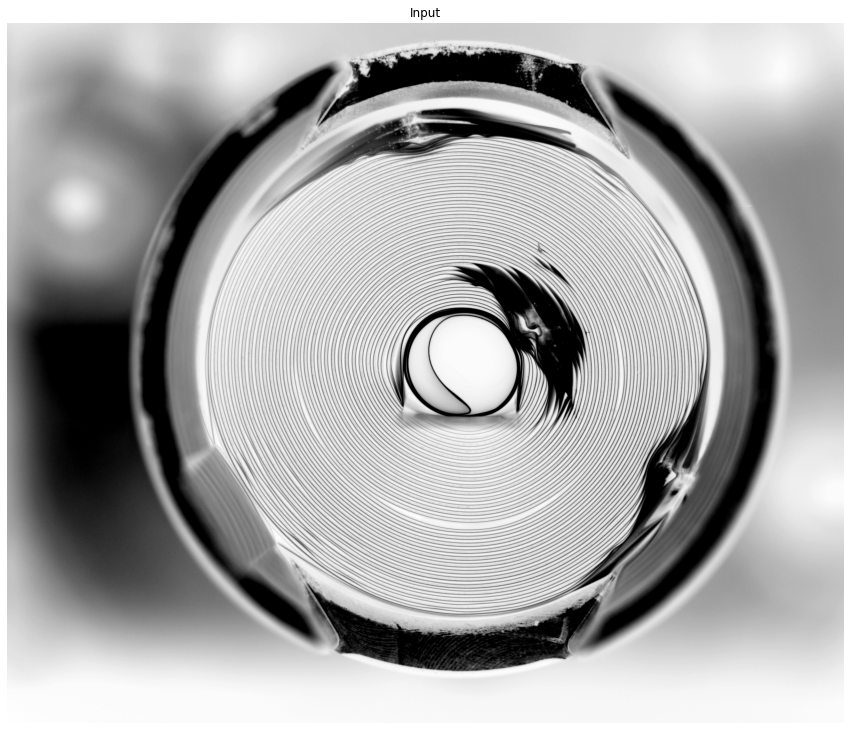

In [7]:
display([ tf.image.adjust_contrast(sample, -0.6)])

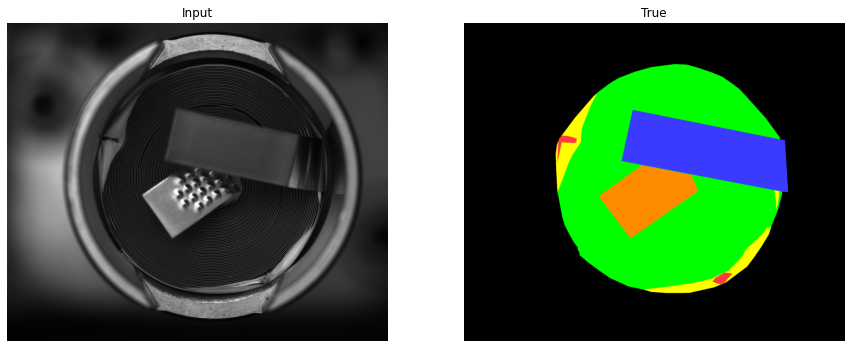

In [8]:
loc_ori_41 = "JR_2Tab_20211109/"
loc_mask = "JR_lower_part/Mask_Image/"

sda = cv2.imread(loc_ori_41 + "[2021-10-15]15.11.51.728_1_7_Image.bmp")
samp_mask = cv2.imread(loc_mask + "2차_41장/" + "[2021-10-15]15.11.51.728_1_7_Image.png")
samp_mask = cv2.cvtColor(samp_mask, cv2.COLOR_BGR2RGB) / 255.0

display([sda, samp_mask])

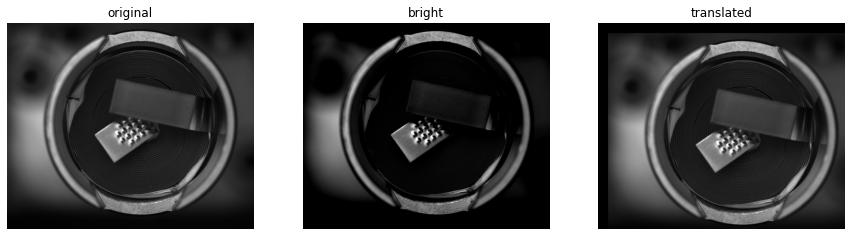

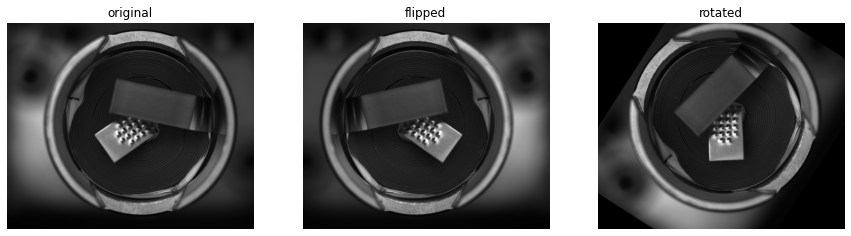

In [9]:
b_img = tf.image.random_brightness(sda, 0.2)
t_img = tfa.image.translate(sda, [100,100])

f_img = tf.image.flip_left_right(sda)
rot_img = tfa.image.rotate(sda, 1)

display([sda, b_img, t_img], title= ['original', 'bright', 'translated'])
display([sda, f_img, rot_img], title = ['original', 'flipped', 'rotated'])

Remove triangle label

In [10]:
tri = cv2.inRange(mask, (.99, 0, .99), (1,0,1))
mask[tri != 0] = [0,1,0]

colors = np.unique(tf.reshape(mask,[-1,3]), axis=0)

In [11]:
color_dict = {i: list(x) for i,x in enumerate(colors)}

#1,1,0: Yellow 0,1,0 Green 101 pink, 000b 011 cyan 100 Red 
# 0 bg, 1 Circle 2 hole 3 small 4 stamp 5 psuhed 
# 0 bg, 1 Battery 2 hole 3 pressed 4 dent 5 in_tab 6 out_tab
color_dict[6] = color_dict[3]
color_dict[3] = [1,1,0]

print(color_dict)

def rgb_to_onehot(rgb_arr, color_dict):
    num_classes = len(color_dict)
    shape = rgb_arr.shape[:2] + (num_classes,)
    arr = np.zeros(shape, dtype=np.int32)
    for i, cls in enumerate(color_dict):
        arr[:, :, i] = np.all(rgb_arr.reshape((-1, 3)) == color_dict[i], axis=1).reshape(shape[:2])
    return arr

{0: [0.0, 0.0, 0.0], 1: [0.0, 1.0, 0.0], 2: [0.0, 1.0, 1.0], 3: [1, 1, 0], 4: [1.0, 0.23529411764705882, 0.23529411764705882], 5: [1.0, 0.5490196078431373, 0.0], 6: [0.23137254901960785, 0.23137254901960785, 1.0]}


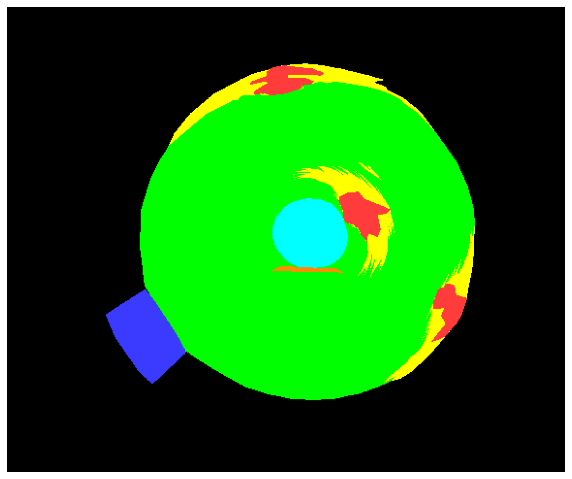

In [12]:
a = rgb_to_onehot(mask,color_dict)

bb = tf.expand_dims(np.argmax(a, axis=-1),-1)
bbb = tf.image.resize(bb, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR) #480, 576 960,1152
 # 2048 x 2448
    
onehot_to_rgb(bbb)

In [18]:
"""
import glob

loc_1tab = "JR_1Tab_20211119_labeling/*/*.bmp"

files = glob.glob(loc_1tab)


print(len(files))
print(files[40])

file_name = files[40].split("/")


file_name = "JR_1tab_mask/" + file_name[-1][:-4] + '.png'

print(file_name)
"""

47
JR_1Tab_20211119_labeling/Dent/[2021-11-18]02.27.02.868_0_29236_Image.bmp
JR_1tab_mask/[2021-11-18]02.27.02.868_0_29236_Image.png


In [13]:
import glob

loc_1tab = "JR_1Tab_20211119_labeling/*/*.bmp"

def create_dataset(brightness=False, flip=False, rotation=False,  shift=False, contrast = False):
    val_x = []
    val_y = []
    train_x = []
    train_y = []
    
    loc_1tab = "JR_1Tab_20211119_labeling/*/*.bmp"
    files = glob.glob(loc_1tab)
    
    """ 1Tab DATA """
    for idx, img in enumerate(files):
        print(img)
        if RGB:
            n = cv2.imread(img)
        else:
            n = cv2.imread(img, 0)
            n = tf.expand_dims(n,-1)
                
        n = tf.cast(n, tf.float32) / 255.0
        n = tf.image.resize(n, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR) 

        if idx < 47: #47 images, 37~46 val
            train_x.append(n)

            if brightness:
                b_img = tf.image.random_brightness(n, 0.2)
                b_img = tf.cast(b_img, tf.float32) / 255.0
                b_img = tf.image.resize(b_img, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
                train_x.append(b_img)

            if flip:
                flipped_img = tf.image.flip_left_right(n)
                flipped_img1 = tf.image.flip_up_down(n)
                train_x.append(flipped_img)
                train_x.append(flipped_img1)

            if rotation:
                angle = np.random.uniform(0, 2*np.pi)
                #angle1 = np.random.uniform(0, 2*np.pi)
                rot_img = tfa.image.rotate(n, angle)
                #rot_img1 = tfa.image.rotate(n, angle1)
                train_x.append(rot_img)
                #train_x.append(rot_img1)

            if shift:
                x, y = np.random.randint(-100,100,size=2)
                shifted_img = tfa.image.translate(n,[x,x])
                train_x.append(shifted_img)

            if contrast:
                c_img = tf.image.adjust_contrast(n,-0.6)
                train_x.append(c_img)

            file_name = img.split("/")
            png_name = "JR_1tab_mask/" + file_name[-1][:-4] + '.png'

            y = cv2.imread(png_name)
            y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB) / 255.0
            cc = cv2.inRange(y, (.99, 0, .99), (1,0,1))
            y[cc != 0] = [0,1,0]
            a = rgb_to_onehot(y, color_dict) #change to one hot
            bb = tf.expand_dims(np.argmax(a, axis=-1),-1) #combine one hot
            mask = tf.image.resize(bb, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
            mask = np.round(mask)

            train_y.append(mask)

            if brightness: 
                train_y.append(mask)
            if flip: 
                flipped_mask = tf.image.flip_left_right(mask)
                flipped_mask1 = tf.image.flip_up_down(mask)
                train_y.append(flipped_mask)
                train_y.append(flipped_mask1)
            if rotation:
                rot_mask = tfa.image.rotate(mask, angle)
                #rot_mask1 = tfa.image.rotate(mask, angle1)
                train_y.append(rot_mask)
                #train_y.append(rot_mask1)
            if shift: 
                shifted_mask = tfa.image.translate(mask,[x,x])
                train_y.append(shifted_mask)
            if contrast:
                train_y.append(mask)
                
            continue
            
        val_x.append(n)
        #MASK
        file_name = img.split("/")
        png_name = "JR_1tab_mask/" + file_name[-1][:-4] + '.png'
        
        y = cv2.imread(png_name) 
        y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB) / 255.0
        tri = cv2.inRange(y, (.99, 0, .99), (1,0,1))
        y[tri != 0] = [0,1,0]
        a = rgb_to_onehot(y, color_dict) #change to one hot
        bb = tf.expand_dims(np.argmax(a, axis=-1),-1) #combine one hot
        mask = tf.image.resize(bb, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
        mask = np.round(mask)

        val_y.append(mask)
    
    
    for idx, img in enumerate(glob.glob(loc_ori_41 + "*.bmp")):
        if RGB:
            n = cv2.imread(img)
        else:
            n = cv2.imread(img, 0)
            n = tf.expand_dims(n,-1)
                
        n = tf.cast(n, tf.float32) / 255.0
        n = tf.image.resize(n, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR) 

        train_x.append(n)
        
       
            
        if brightness:
            b_img = tf.image.random_brightness(n, 0.2)
            b_img = tf.cast(b_img, tf.float32) / 255.0
            b_img = tf.image.resize(b_img, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
            train_x.append(b_img)

        if flip:
            flipped_img = tf.image.flip_left_right(n)
            flipped_img1 = tf.image.flip_up_down(n)
            train_x.append(flipped_img)
            train_x.append(flipped_img1)

        if rotation:
            angle = np.random.uniform(0, 2*np.pi)
            #angle1 = np.random.uniform(0, 2*np.pi)
            rot_img = tfa.image.rotate(n, angle)
            #rot_img1 = tfa.image.rotate(n, angle1)
            train_x.append(rot_img)
            #train_x.append(rot_img1)

        if shift:
            x, y = np.random.randint(-100,100,size=2)
            shifted_img = tfa.image.translate(n,[x,x])
            train_x.append(shifted_img)
            
        if contrast:
            c_img = tf.image.adjust_contrast(n,-0.6)
            train_x.append(c_img)

        file_name = img.split("/")[-1]  # [2021-10-15]15.11.51.728_1_7_Image.bmp

        png_name = file_name[:-4] + ".png"
        
        y = cv2.imread(loc_mask + "2차_41장/" + png_name)
        y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB) / 255.0
        cc = cv2.inRange(y, (.99, 0, .99), (1,0,1))
        y[cc != 0] = [0,1,0]
        a = rgb_to_onehot(y, color_dict) #change to one hot
        bb = tf.expand_dims(np.argmax(a, axis=-1),-1) #combine one hot
        mask = tf.image.resize(bb, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
        mask = np.round(mask)

        train_y.append(mask)

        if brightness: 
            train_y.append(mask)
        if flip: 
            flipped_mask = tf.image.flip_left_right(mask)
            flipped_mask1 = tf.image.flip_up_down(mask)
            train_y.append(flipped_mask)
            train_y.append(flipped_mask1)
        if rotation:
            rot_mask = tfa.image.rotate(mask, angle)
            #rot_mask1 = tfa.image.rotate(mask, angle1)
            train_y.append(rot_mask)
            #train_y.append(rot_mask1)
        if shift: 
            shifted_mask = tfa.image.translate(mask,[x,x])
            train_y.append(shifted_mask)
        if contrast:
            train_y.append(mask)

    with open("Val_img.txt") as f:
        for idx,line in enumerate(f):
            img = line.splitlines()[0]

            if RGB:
                n = cv2.imread(loc + "Original_Image/" + img)
            else:
                n = cv2.imread(loc + "Original_Image/" + img, 0)
                n = tf.expand_dims(n,-1)
                
            n = tf.cast(n, tf.float32) / 255.0
            n = tf.image.resize(n, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)  
            
            if idx > 9:
                train_x.append(n)
                
                if brightness:
                    b_img = tf.image.random_brightness(n, 0.2)
                    b_img = tf.cast(b_img, tf.float32) / 255.0
                    b_img = tf.image.resize(b_img, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
                    train_x.append(b_img)
                    
                if flip:
                    flipped_img = tf.image.flip_left_right(n)
                    flipped_img1 = tf.image.flip_up_down(n)
                    train_x.append(flipped_img)
                    train_x.append(flipped_img1)
                
                if rotation:
                    angle = np.random.uniform(0, 2*np.pi)
                    #angle1 = np.random.uniform(0, 2*np.pi)
                    rot_img = tfa.image.rotate(n, angle)
                    #rot_img1 = tfa.image.rotate(n, angle1)
                    train_x.append(rot_img)
                    #train_x.append(rot_img1)
                
                if shift:
                    x, y = np.random.randint(-100,100,size=2)
                    shifted_img = tfa.image.translate(n,[x, x])
                    train_x.append(shifted_img)
                    
                if contrast:
                    c_img = tf.image.adjust_contrast(n,-0.6)
                    train_x.append(c_img)

                y = cv2.imread(loc_mask + "1차_80장/" + img) 
                y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB) / 255.0
                cc = cv2.inRange(y, (.99, 0, .99), (1,0,1))
                y[cc != 0] = [0,1,0]
                a = rgb_to_onehot(y, color_dict) #change to one hot
                bb = tf.expand_dims(np.argmax(a, axis=-1),-1) #combine one hot
                mask = tf.image.resize(bb, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
                mask = np.round(mask)
                
                train_y.append(mask)
                
                if brightness: 
                    train_y.append(mask)
                if flip: 
                    flipped_mask = tf.image.flip_left_right(mask)
                    flipped_mask1 = tf.image.flip_up_down(mask)
                    train_y.append(flipped_mask)
                    train_y.append(flipped_mask1)
                if rotation:
                    rot_mask = tfa.image.rotate(mask, angle)
                    #rot_mask1 = tfa.image.rotate(mask, angle1)
                    train_y.append(rot_mask)
                    #train_y.append(rot_mask1)
                if shift: 
                    shifted_mask = tfa.image.translate(mask,[x, x])
                    train_y.append(shifted_mask)
                if contrast:
                    train_y.append(mask)
                    
                continue

            val_x.append(n)
            #MASK
            y = cv2.imread(loc_mask + "1차_80장/" + img) # imread(dir+file_name+".png")
            y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB) / 255.0
            tri = cv2.inRange(y, (.99, 0, .99), (1,0,1))
            y[tri != 0] = [0,1,0]
            a = rgb_to_onehot(y, color_dict) #change to one hot
            bb = tf.expand_dims(np.argmax(a, axis=-1),-1) #combine one hot
            mask = tf.image.resize(bb, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
            mask = np.round(mask)

            val_y.append(mask)
    
    with open("Train_img.txt") as f:
        for line in f:
            img = line.splitlines()[0]
            if RGB:
                n = cv2.imread(loc + "Original_Image/" + img)
            else:
                n = cv2.imread(loc + "Original_Image/" + img, 0)
                n = tf.expand_dims(n,-1)
            n = tf.cast(n, tf.float32) / 255.0
            n = tf.image.resize(n, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
            train_x.append(n)
            
            if brightness:
                b_img = tf.image.random_brightness(n, 0.2)
                b_img = tf.cast(b_img, tf.float32) / 255.0
                b_img = tf.image.resize(b_img, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
                train_x.append(b_img)
                    
            if flip:
                flipped_img = tf.image.flip_left_right(n)
                flipped_img1 = tf.image.flip_up_down(n)
                train_x.append(flipped_img)
                train_x.append(flipped_img1)

            if rotation:
                angle = np.random.uniform(0, 2*np.pi)
                #angle1 = np.random.uniform(0, 2*np.pi)
                rot_img = tfa.image.rotate(n, angle)
                #rot_img1 = tfa.image.rotate(n, angle1)
                train_x.append(rot_img)
                #train_x.append(rot_img1)

            if shift:
                x, y = np.random.randint(-100,100,size=2)
                shifted_img = tfa.image.translate(n,[x, x])
                train_x.append(shifted_img)
                
            if contrast:
                c_img = tf.image.adjust_contrast(n,-0.6)
                train_x.append(c_img)

            y = cv2.imread(loc_mask + "1차_80장/" + img)
            y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB) / 255.0
            cc = cv2.inRange(y, (.99, 0, .99), (1,0,1))
            y[cc != 0] = [0,1,0]
            a = rgb_to_onehot(y, color_dict) #change to one hot
            bb = tf.expand_dims(np.argmax(a, axis=-1),-1) #combine one hot
            mask = tf.image.resize(bb, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
            mask = np.round(mask)

            train_y.append(mask)

            if brightness: 
                train_y.append(mask)
            if flip: 
                flipped_mask = tf.image.flip_left_right(mask)
                flipped_mask1 = tf.image.flip_up_down(mask)
                train_y.append(flipped_mask)
                train_y.append(flipped_mask1)
            if rotation:
                rot_mask = tfa.image.rotate(mask, angle)
                #rot_mask1 = tfa.image.rotate(mask, angle1)
                train_y.append(rot_mask)
                #train_y.append(rot_mask1)
            if shift: 
                shifted_mask = tfa.image.translate(mask,[x, x])
                train_y.append(shifted_mask)
            if contrast:
                train_y.append(mask)
    
    val_x = tf.convert_to_tensor(val_x)
    val_y = tf.convert_to_tensor(val_y)
    train_x = tf.convert_to_tensor(train_x)
    train_y = tf.convert_to_tensor(train_y)
    
    return train_x, train_y, val_x, val_y      

In [14]:
train_x, train_y, val_x, val_y = create_dataset(brightness=False, flip=False, rotation=True, shift=False, contrast=False)
print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape) # (111+47) * 2 = 158* 2 = 316

JR_1Tab_20211119_labeling/Hole/[2021-11-16]20.46.16.799_0_1035_Image.bmp
JR_1Tab_20211119_labeling/Hole/[2021-11-16]23.24.00.982_0_4692_Image.bmp
JR_1Tab_20211119_labeling/Hole/[2021-11-17]07.33.10.456_0_17662_Image.bmp
JR_1Tab_20211119_labeling/Hole/[2021-11-17]14.56.08.431_0_8983_Image.bmp
JR_1Tab_20211119_labeling/Hole/[2021-11-18]03.36.46.371_0_33055_Image.bmp
JR_1Tab_20211119_labeling/Hole/[2021-11-18]03.36.46.371_1_33055_Image.bmp
JR_1Tab_20211119_labeling/Hole/[2021-11-18]03.58.55.317_1_34213_Image.bmp
JR_1Tab_20211119_labeling/Hole/[2021-11-18]05.09.23.785_0_37069_Image.bmp
JR_1Tab_20211119_labeling/OK/[2021-11-18]10.17.58.630_0_233_Image.bmp
JR_1Tab_20211119_labeling/OK/[2021-11-18]10.18.17.885_0_249_Image.bmp
JR_1Tab_20211119_labeling/OK/[2021-11-18]10.18.28.896_1_253_Image.bmp
JR_1Tab_20211119_labeling/OK/[2021-11-18]10.18.29.694_0_255_Image.bmp
JR_1Tab_20211119_labeling/OK/[2021-11-18]10.18.42.634_0_271_Image.bmp
JR_1Tab_20211119_labeling/OK/[2021-11-18]10.19.03.672_0_297_I

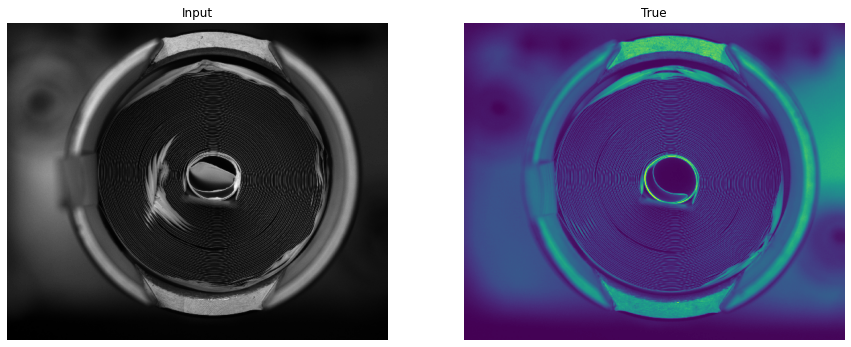

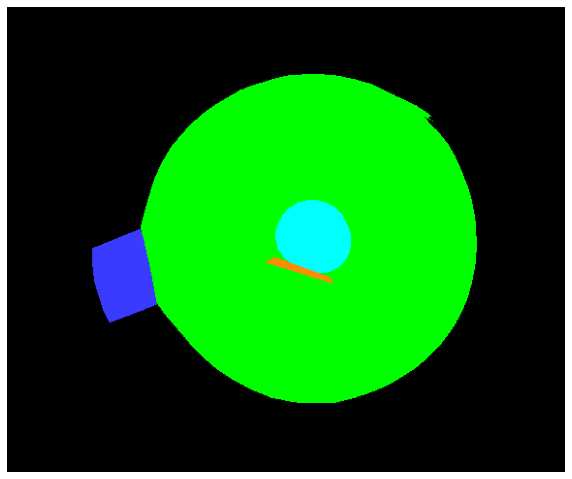

In [15]:
display([val_x[0], val_x[1]])
onehot_to_rgb(val_y[7])

In [16]:
sample_image = val_x[0]
sample_mask = val_y[0]

sample_image2 = val_x[1]
sample_mask2 = val_y[1]

print(sample_image.shape, sample_mask.shape)

(480, 576, 1) (480, 576, 1)


In [17]:
import tensorflow.keras.backend as K

train_y_onehot = tf.keras.utils.to_categorical(K.cast(train_y, tf.int32))
val_y_onehot = tf.keras.utils.to_categorical(K.cast(val_y, tf.int32))

print(train_y.shape, train_y_onehot.shape)

(314, 480, 576, 1) (314, 480, 576, 7)


In [18]:
print(train_y_onehot.shape, val_y_onehot.shape)

(314, 480, 576, 7) (10, 480, 576, 7)


찍힘 class에 가장 높은 weight

In [24]:
N = train_x.shape[0]

sample_weights = np.ones((N,) + IMG_SIZE + (1,))
#sample_weights_val = np.zeros((20,) + IMG_SIZE + (1,))

int_label = tf.expand_dims(np.argmax(train_y_onehot, axis=-1),-1)
#int_label_val = tf.expand_dims(np.argmax(val_y_onehot, axis=-1),-1)

#sample_weights_val = np.zeros(val_y.shape)

#bg_count = (np.array(train_y)==0).sum()
#stamp_count = (np.array(train_y)==4).sum()
#hole_count = (np.array(train_y)==2).sum()
#push_count = (np.array(train_y)==3).sum()
#circle_count = (np.array(train_y)==1).sum()

#denom = bg_count+circle_count+push_count+stamp_count+hole_count

#CLASS_WEIGHT = [(denom/bg_count).round(), (denom/circle_count).round(), (denom/hole_count).round(), 
#                (denom/push_count).round(), (denom/stamp_count).round() ]

#print(train_y.shape, val_y.shape)
# your own weight corresponding here:
#sample_weights[train_y==0] = 1                                                                                                       
#sample_weights[int_label==1] = 50                                                                                                               
#sample_weights[int_label==2] = 10                                                                                                             
#sample_weights[int_label==3] = 0.001
sample_weights[int_label==4] = 500
#sample_weights_val[int_label_val==4] = 20

#print(sample_weights_val.shape, val_y.shape)
#sample_weights_val[val_y==0] = 1                                                                                                       
#sample_weights_val[val_y==1] = 1                                                                                                               
#sample_weights_val[val_y==2] = 1                                                                                                             
#sample_weights_val[val_y==3] = 1
#sample_weights_val[val_y==4] = 5  

print(np.unique(sample_weights), sample_weights.shape)

[  1. 500.] (314, 480, 576, 1)


In [19]:
print(train_x.shape, val_x.shape)

BUFFER_SIZE = train_x.shape[0]

train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y_onehot))#, sample_weights))
train_ds = train_ds.shuffle(buffer_size = BUFFER_SIZE-NUM_VAL).batch(BATCH_SIZE)

val_ds= tf.data.Dataset.from_tensor_slices((val_x, val_y_onehot))#, sample_weights_val))
val_ds = val_ds.shuffle(buffer_size = NUM_VAL).batch(BATCH_SIZE)

(314, 480, 576, 1) (10, 480, 576, 1)


Define Backbone model as well as segmentation model

In [34]:
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

sm.set_framework('tf.keras')
sm.framework()

if OPTIMIZER == "Adam":
    opt = keras.optimizers.Adam(learning_rate=LR) #default 0.001
elif OPTIMIZER == "RMSprop":
    opt = keras.optimizers.RMSprop(lr=LR) #default 0.001
    
if RGB: 
    ENC = 'imagenet'
    channel = 3
else: 
    ENC = None
    channel = 1
    

base_model = sm.Linknet(BACKBONE, input_shape = IMG_SIZE + (3,), classes=7, encoder_weights='imagenet',
                      activation='softmax', encoder_freeze = ENC_FREEZE)

if not RGB:
    inp = Input(shape = IMG_SIZE + (1,) )

    l1 = Conv2D(3, (1,1))(inp) # map N channels data to 3 channels
    out = base_model(l1)

    model = Model(inp, out)
else:
    model = base_model

#model = sm.PSPNet(BACKBONE, input_shape = IMG_SIZE + (1,), classes=7, encoder_weights=None, 
#                  activation=ACTIVATION, encoder_freeze = ENC_FREEZE)

model.compile(
    optimizer = opt,
    loss = sm.losses.DiceLoss() + sm.losses.CategoricalFocalLoss(),
    #dice_score_loss,#tf.keras.losses.SparseCategoricalCrossentropy(from_logits=FROM_LOGITS), 
    metrics=['accuracy'], 
)

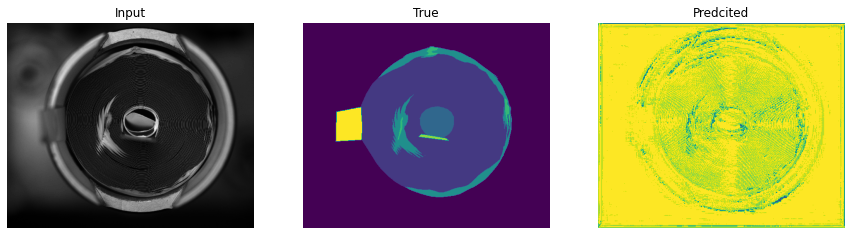

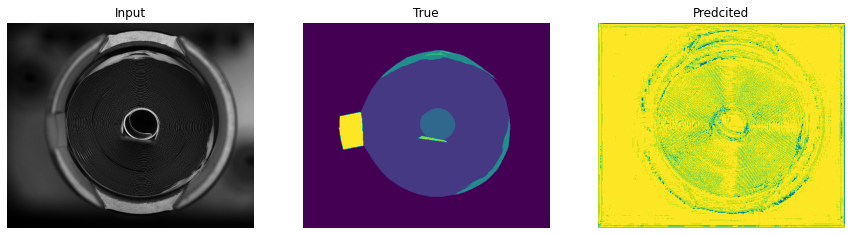

In [35]:
show_predictions()

In [36]:
import gc
import os
import datetime

#logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

gc.collect()

class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('{}에포크 이후의 예측 예시'.format(epoch+1))
    print ( 'Training Specifics: LR: {}, Validation size: {}, Image size: {}.'.format(LR, NUM_VAL,IMG_SIZE))
    print ('Current Accuracy: {}'.format(logs['accuracy']))
    print ('Validation Accuracy: {}'.format(logs['val_accuracy']))
    #tensorboard_callback
    #
    gc.collect()
    

For 960 1152 image size, works upto total 140 images.
(480,576) 3 augs
(960, 1152) 3 augs (46*4 image usued for training.)
(1440, 1920) no augmentations applied Batch size = 2 for all cases(46images used for training.)
(1200, x) works for 2augs,  with B=2 !

In [37]:
model_history = model.fit(train_ds,
                          epochs=EPOCHS,
                          validation_data = val_ds,
                          callbacks=[DisplayCallback()],)       

Epoch 1/100


KeyboardInterrupt: 

DO VALIDATION CHECK BELOW

In [33]:
#show_predictions(test_mode=True, x=val_x, y=val_y, num=10)
ACC = np.round(model_history.history['val_accuracy'][-1],3)

model.save('saved_model_Unet_1202_ACC_{}_{}_FFTFF'.format(ACC, "alltrain_combined_loss"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model_Unet_1202_ACC_0.99_alltrain_combined_loss_FFTFF/assets


In [31]:
pred_mask = []
val_xx = []

img_dir_l = ["dataset/2021-11-01-09/*.bmp", "dataset/Raw/*.bmp"] 

img_dir = img_dir_l[1]

for img in glob.glob (img_dir):
    n = cv2.imread(img, 0) # Gray Scale
    n = tf.expand_dims(n,-1)
    #n = cv2.cvtColor(n, cv2.COLOR_BGR2RGB) # Gray RGB
    #n = tf.expand_dims(n,-1) #Gray Scale

    n = tf.cast(n, tf.float32) / 255.0
    n = tf.image.resize(n, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

    val_xx.append(n)
    #MASK

    image = tf.expand_dims(n,0)
    pred_mask.append(model.predict(image, batch_size=1)) # idx, 1, 1, H, W, 4

val_xx = tf.convert_to_tensor(val_xx)

In [57]:
"""FOR TRAINING IMAGE CHECK ONLY"""

"""
pred_mask = []
val_x = []
val_y = []

img_dir = "JR_1Tab_20211119_labeling/*/*.bmp"

for img in glob.glob (img_dir):
    n = cv2.imread(img, 0) # Gray Scale
    n = tf.expand_dims(n,-1)
    #n = cv2.cvtColor(n, cv2.COLOR_BGR2RGB) # Gray RGB
    #n = tf.expand_dims(n,-1) #Gray Scale

    n = tf.cast(n, tf.float32) / 255.0
    n = tf.image.resize(n, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

    val_x.append(n)
    #MASK

    image = tf.expand_dims(n,0)
    pred_mask.append(model.predict(image, batch_size=1)) # idx, 1, 1, H, W, 4
    
    file_name = img.split("/")
    png_name = "JR_1tab_mask/" + file_name[-1][:-4] + '.png'

    y = cv2.imread(png_name)
    y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB) / 255.0
    cc = cv2.inRange(y, (.99, 0, .99), (1,0,1))
    y[cc != 0] = [0,1,0]
    a = rgb_to_onehot(y, color_dict) #change to one hot
    bb = tf.expand_dims(np.argmax(a, axis=-1),-1) #combine one hot
    mask = tf.image.resize(bb, IMG_SIZE, antialias = True, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    mask = np.round(mask)

    val_y.append(mask)
    
val_x = tf.convert_to_tensor(val_x)
val_y = tf.convert_to_tensor(val_y)

"""


In [26]:
def onehot_to_rgb(one_hot, label = None):
    #0 bg 1 circle 2 hole 3push 4stamped

    channel_0 = np.zeros(IMG_SIZE + (1,)) #prediction
    channel_1 = np.zeros(IMG_SIZE + (1,))
    channel_2 = np.zeros(IMG_SIZE + (1,))
    
    ex = one_hot # ex = H,W,1
    
    if label:
        channel_0[ex==1] = color_dict[label][0]
        channel_1[ex==1] = color_dict[label][1]
        channel_2[ex==1] = color_dict[label][2]
        com = tf.concat([channel_0, channel_1, channel_2], -1)
        return com

    channel_0[ex==1] = color_dict[1][0]
    channel_1[ex==1] = color_dict[1][1]
    channel_2[ex==1] = color_dict[1][2]

    channel_0[ex==3] = color_dict[3][0]
    channel_1[ex==3] = color_dict[3][1]
    channel_2[ex==3] = color_dict[3][2]

    channel_0[ex==2] = color_dict[2][0]
    channel_1[ex==2] = color_dict[2][1]
    channel_2[ex==2] = color_dict[2][2]

    channel_0[ex==0] = color_dict[0][0]
    channel_1[ex==0] = color_dict[0][1]
    channel_2[ex==0] = color_dict[0][2]
    
    channel_0[ex==4] = color_dict[4][0]
    channel_1[ex==4] = color_dict[4][1]
    channel_2[ex==4] = color_dict[4][2]
    
    channel_0[ex==5] = color_dict[5][0]
    channel_1[ex==5] = color_dict[5][1]
    channel_2[ex==5] = color_dict[5][2]
    
    channel_0[ex==6] = color_dict[6][0]
    channel_1[ex==6] = color_dict[6][1]
    channel_2[ex==6] = color_dict[6][2]
    

    com = tf.concat([channel_0, channel_1, channel_2], -1)
    
    return com

(480, 576, 7)
(array([0., 1.], dtype=float32), array([275141,   1339]))


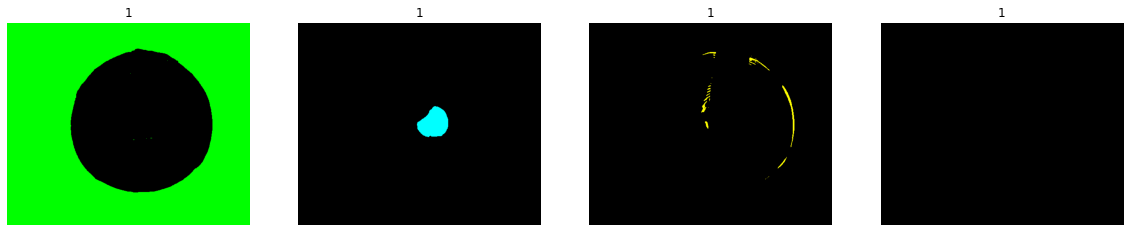

In [27]:
idx=0

pred = np.float32(pred_mask[idx][0])
print(pred.shape)

ex = np.round(pred) # ex = H,W,7

circle = tf.expand_dims(ex[:,:,1], -1)
pushed = tf.expand_dims(ex[:,:,3], -1) 
bg = tf.expand_dims(ex[:,:,0], -1)
hole = tf.expand_dims(ex[:,:,2], -1)
stamped = tf.expand_dims(ex[:,:,4], -1)
in_tab = tf.expand_dims(ex[:,:,5], -1)
out_tab = tf.expand_dims(ex[:,:,6], -1)

print(np.unique(pushed,return_counts=True))

#bg = 0, pushed = 1, stamped = 2, circle = 3

display([onehot_to_rgb(bg,label=0), onehot_to_rgb(hole,label=2), 
         onehot_to_rgb(pushed,label=3), onehot_to_rgb(stamped, label=4)], title=['1','1','1','1'],
        fig_size=20)

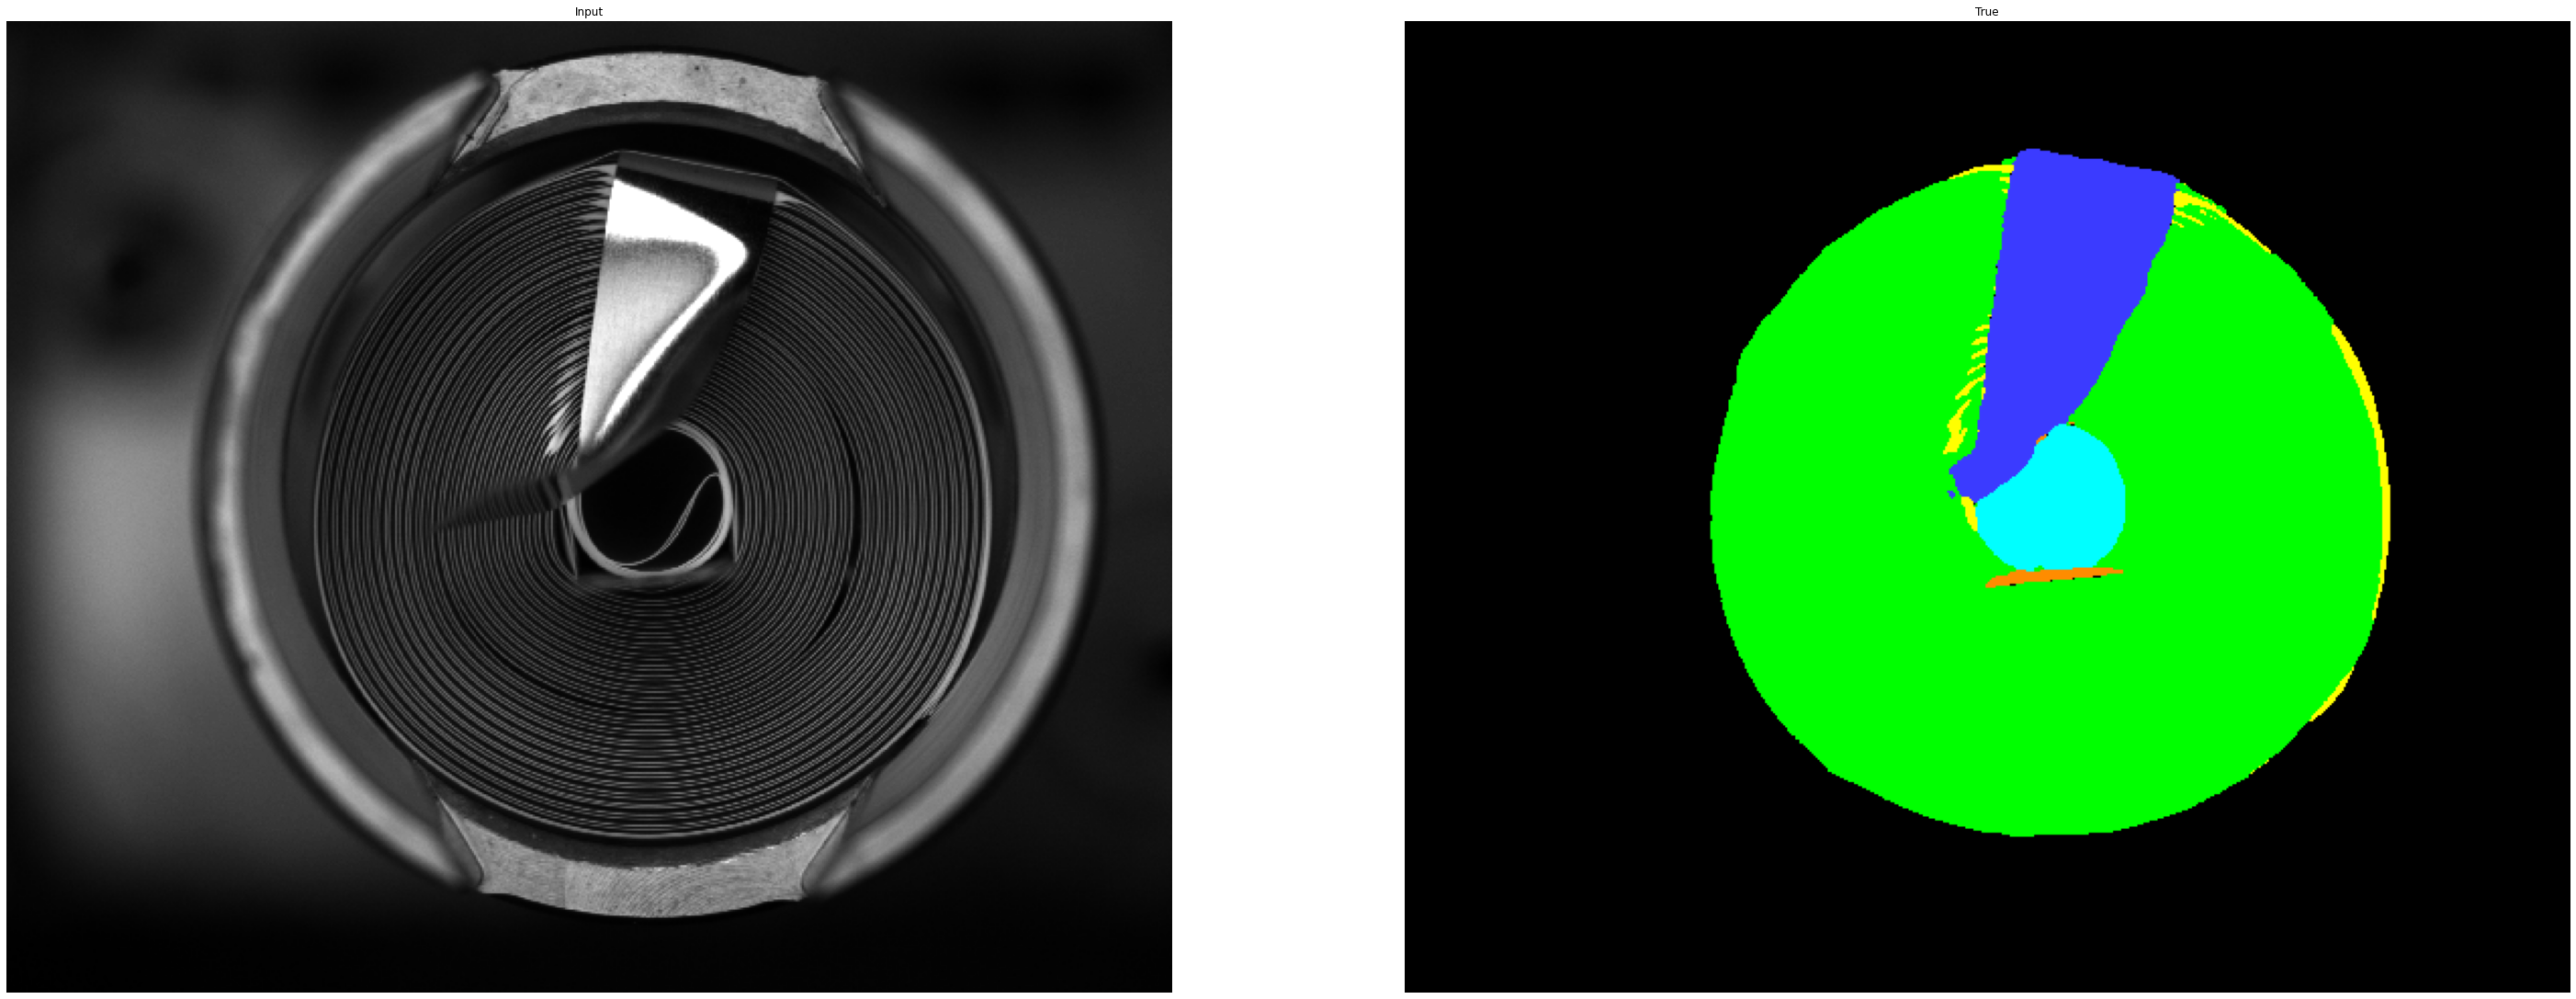

In [29]:
pred = np.float32(pred_mask[idx][0])

ex = np.round(pred) # ex = H,W,7

circle = tf.expand_dims(ex[:,:,1], -1)
pushed = tf.expand_dims(ex[:,:,3], -1) 
bg = tf.expand_dims(ex[:,:,0], -1)
hole = tf.expand_dims(ex[:,:,2], -1)
stamped = tf.expand_dims(ex[:,:,4], -1)
in_tab = tf.expand_dims(ex[:,:,5], -1)
out_tab = tf.expand_dims(ex[:,:,6], -1)
    
channel_0 = np.zeros(IMG_SIZE+(1,)) #prediction
channel_1 = np.zeros(IMG_SIZE+(1,))
channel_2 = np.zeros(IMG_SIZE+(1,))

channel_0[pushed==1] = color_dict[3][0]
channel_1[pushed==1] = color_dict[3][1]
channel_2[pushed==1] = color_dict[3][2]

channel_0[circle==1] = color_dict[1][0]
channel_1[circle==1] = color_dict[1][1]
channel_2[circle==1] = color_dict[1][2]

channel_0[stamped==1] = color_dict[4][0]
channel_1[stamped==1] = color_dict[4][1]
channel_2[stamped==1] = color_dict[4][2]

channel_0[bg==1] = color_dict[0][0]
channel_1[bg==1] = color_dict[0][1]
channel_2[bg==1] = color_dict[0][2]

channel_0[hole==1] = color_dict[2][0]
channel_1[hole==1] = color_dict[2][1]
channel_2[hole==1] = color_dict[2][2]

channel_0[in_tab==1] = color_dict[5][0]
channel_1[in_tab==1] = color_dict[5][1]
channel_2[in_tab==1] = color_dict[5][2]

channel_0[out_tab==1] = color_dict[6][0]
channel_1[out_tab==1] = color_dict[6][1]
channel_2[out_tab==1] = color_dict[6][2]

com = tf.concat([channel_0, channel_1, channel_2], -1)

display([val_xx[idx], com],fig_size=50)
#display([val_x[idx], onehot_to_rgb(val_y[idx]), com],fig_size=50)

In testing Mode...


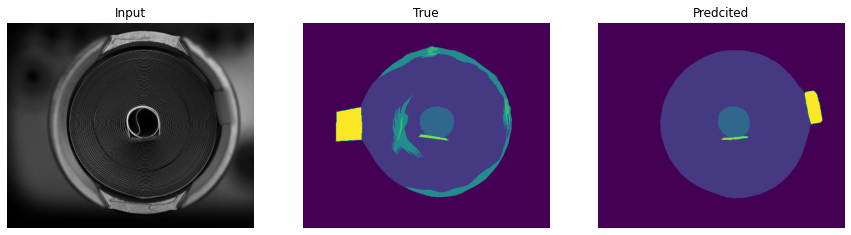

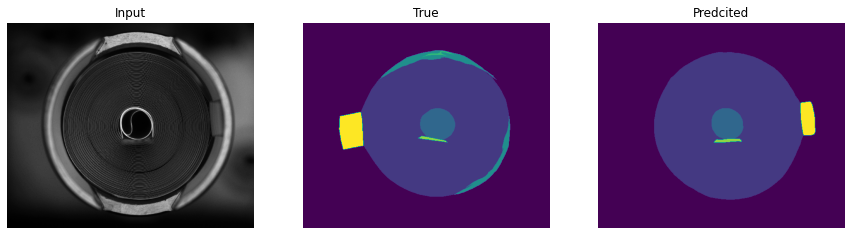

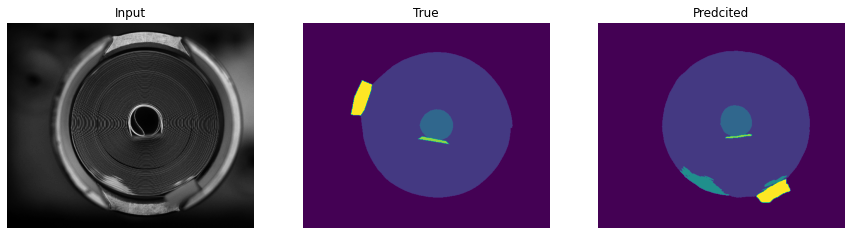

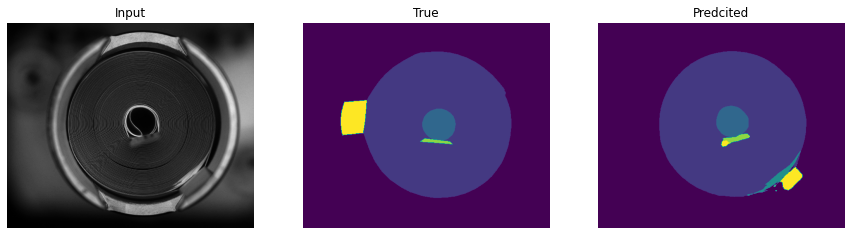

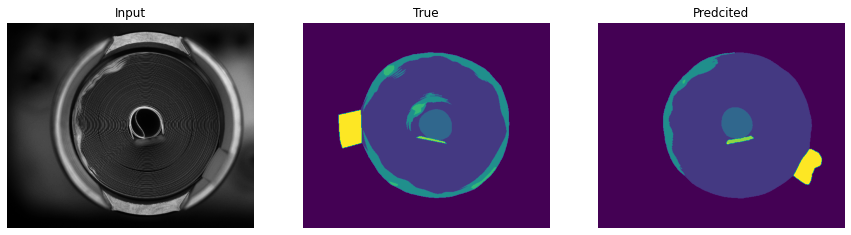

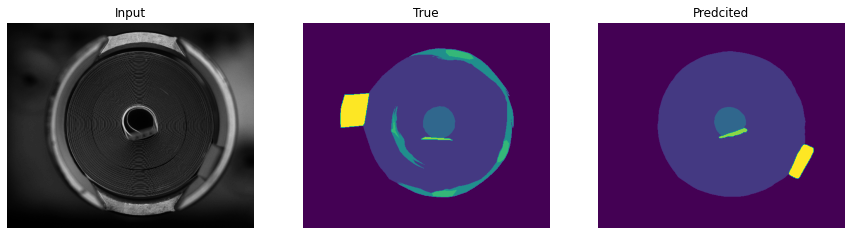

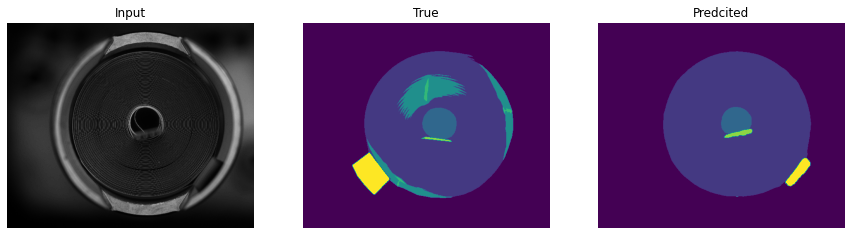

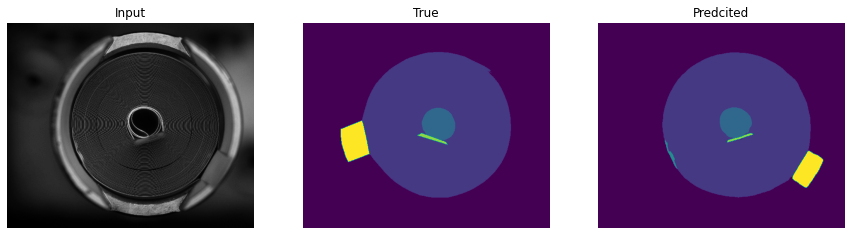

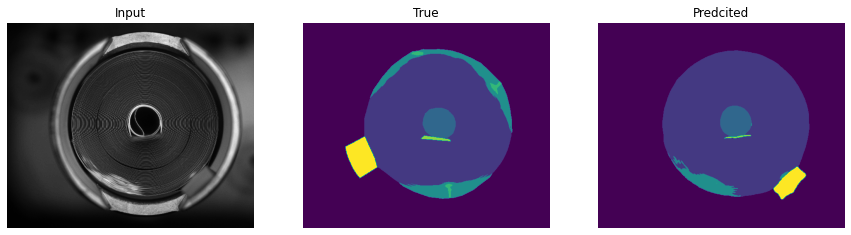

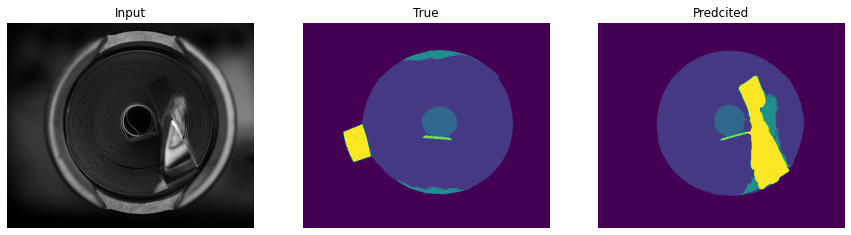

In [32]:
show_predictions(test_mode=True, x=val_xx, y=val_y, num=10)

In [ ]:
"""
BUFFER_SIZE = train_x.shape[0]

train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))#, sample_weights))
train_ds = train_ds.shuffle(buffer_size = BUFFER_SIZE-NUM_VAL).batch(BATCH_SIZE)

val_ds= tf.data.Dataset.from_tensor_slices((val_x, val_y))#, sample_weights))
val_ds = val_ds.shuffle(buffer_size = NUM_VAL).batch(BATCH_SIZE)

sm.set_framework('tf.keras')
sm.framework()

if OPTIMIZER == "Adam":
    opt = keras.optimizers.Adam(learning_rate=LR) #default 0.001
elif OPTIMIZER == "RMSprop":
    opt = keras.optimizers.RMSprop(lr=LR) #default 0.001


model_2 = sm.PSPNet(BACKBONE, input_shape = IMG_SIZE + (1,), classes=5, encoder_weights=None, 
                  activation=ACTIVATION, encoder_freeze = ENC_FREEZE)

model_2.compile(
    optimizer = opt,
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=FROM_LOGITS), 
    metrics=['accuracy'], 
)

model_history_2 = model_2.fit(train_ds, 
                          epochs=EPOCHS,
                          validation_data = val_ds,
                          callbacks=[DisplayCallback()],)  
"""

In [ ]:
"""
def weighted_dice_coeff(y_true, y_pred, weight):
    smooth = 1.
    
    y_true = tf.one_hot(K.cast(y_true, tf.int32), depth=5) # K.layers.Flatten()(tf.one_hot(tf.cast(y_true, tf.int32), depth=5))
    y_true = y_true[:,:,:,0,:]
    
    #print(np.unique(ans),ans.shape)
    print(y_true.shape, y_pred.shape)
    #print(np.unique(np.array(y_true)), np.array(np.unique(y_pred)))
    
    w, m1, m2 = weight * weight, y_true, y_pred
    intersection = (m1 * m2)
    score = (2. * K.sum(w * intersection) + smooth) / (K.sum(w * m1) + K.sum(w * m2) + smooth)
    return score


def weighted_dice_loss(y_true, y_pred):
    #y_true = K.cast(y_true, 'float32')
    #y_pred = K.cast(y_pred, 'float32')
    # if we want to get same size of output, kernel size must be odd number
    if K.int_shape(y_pred)[1] == 128:
        kernel_size = 11
    elif K.int_shape(y_pred)[1] == 256:
        kernel_size = 21
    elif K.int_shape(y_pred)[1] == 512:
        kernel_size = 21
    elif K.int_shape(y_pred)[1] == 1024:
        kernel_size = 41
    elif K.int_shape(y_pred)[1] == 960:
        kernel_size = 21 
    else:
        raise ValueError('Unexpected image size')
    averaged_mask = K.pool2d(
        y_true, pool_size=(kernel_size, kernel_size), strides=(1, 1), padding='same', pool_mode='avg')
    border = K.cast(K.greater(averaged_mask, 0.005), 'float32') * K.cast(K.less(averaged_mask, 0.995), 'float32')
    weight = K.ones_like(averaged_mask)
    w0 = K.sum(weight)
    weight += border * 2
    w1 = K.sum(weight)
    weight *= (w0 / w1)
    loss = 1 - weighted_dice_coeff(y_true, y_pred, weight)
    return loss
"""

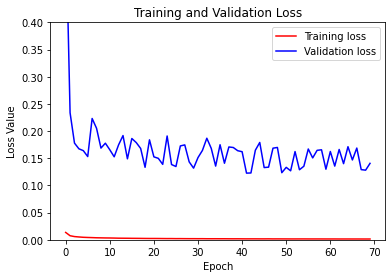

In [26]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(70)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 0.4])
plt.legend()
plt.show()

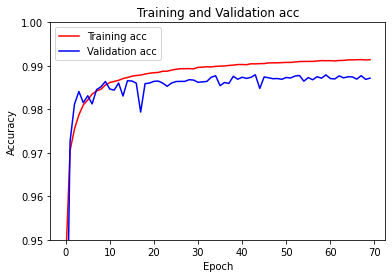

In [27]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

epochs = range(70)

plt.figure()
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.95,1])
plt.legend()
plt.show()

Saving Model for use in Inference